In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

# 1. Предварительная очистка данных

Необходимо в файле Exell для раскрашеных документов поставить метки - красный - 0, зеленый 1

## 1.1 Загрузка таблицы и удаление не нужных столбцов

In [2]:
pathdir = 'Excel'
listfile = os.listdir(pathdir)
path = pathdir + '\\' + listfile[-1]
path

'Excel\\14.input_ntc_26.12.2019.xlsx'

Можно указать вручную

In [3]:
# path =
data = pd.read_excel(path, encoding='cp1251') # для csv - read_csv
data.shape

(9535, 14)

Сохраним дату документа

In [4]:
date = path[-15:-5]
date

'26.12.2019'

Выбрать только требуемые столбцы

In [5]:
data = data[['Обозначение документа', 'Наименование документа',
            'Кол-во листов А4 ', 'Готовность документа', 'Подразделение',
            'Разработчик', 'Метка готовности']]

In [6]:
data.shape # размерность таблицы (количество строк, количество столбцов)

(9535, 7)

In [7]:
data[0:10] # первые 10 строк

,Обозначение документа,Наименование документа,Кол-во листов А4,Готовность документа,Подразделение,Разработчик,Метка готовности
0,NaN,Документация на АКС Р-779-16,NaN,NaN,NaN,NaN,NaN
1,ИКГТ.461273.052ВЭ,АКС Р-779-16. Ведомость эксплуатационных докум...,3.0,Готов,НТЦ ИКС НК,Петухова,0.0
2,ИКГТ.461273.052ВЭ-ЛУ,АКС Р-779-16. Ведомость эксплуатационных докум...,2.0,Готов,НТЦ ИКС НК,Петухова,0.0
3,NaN,Документация общая,2652.0,NaN,NaN,NaN,NaN
4,ИКГТ.461273.052,АКС Р-779-16. Спецификация,182.0,В разработке,ПКО,NaN,0.0
5,ИКГТ.461273.052Э4,АКС Р-779-16. Схема электрическая соединений,182.0,Готов,НТЦ ИКС НК,Петухова,0.0
6,"ИКГТ.461273.052ТЭ4, ИКГТ.461273.052ТЭ41",АКС Р-779-16. Таблица соединений,1042.0,Готов,НТЦ ИКС НК,Петухова,0.0
7,ИКГТ.461273.052ПЭ4,АКС Р-779-16. Перечень элементов,39.0,Готов,НТЦ ИКС НК,Петухова,0.0
8,ИКГТ.461273.052РЭ,АКС Р-779-16. Руководство по эксплуатации,NaN,Готов,НТЦ ИКС НК,Русанцов,0.0
9,ИКГТ.461273.052РЭ-ЛУ,АКС Р-779-16. Руководство по эксплуатации. Лис...,NaN,Готов,НТЦ ИКС НК,Русанцов,0.0


Для сохранения таблицы в csv

In [8]:
# data.to_csv('18.09.2019_rkd.csv', encoding='cp1251')

## 1.2 Удаляем строки без обозначения документа, подразделения и количества листов

In [9]:
data = data[~(data['Обозначение документа'].isnull() | (data['Подразделение'].isnull() & data['Кол-во листов А4 '].isnull()))]
data.tail(20) # отобразить последние 20 строк в таблице

,Обозначение документа,Наименование документа,Кол-во листов А4,Готовность документа,Подразделение,Разработчик,Метка готовности
9497,ИКГТ.755223.002,Уголок.Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9498,ИКГТ.758491.020,Втулка.Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9499,ИКГТ.753161.003,Втулка.Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9500,ИКГТ.713312.001,Штемпель.Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9501,ИКГТ.745351.002,Планка. Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9502,ИКГТ.741131.023,Планка. Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9503,ИКГТ.713161.002,Втулка.Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9504,ИКГТ.741532.015,Подкладка.Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9505,ИКГТ.741128.179,Рама. Чертеж детали,NaN,NaN,ПКО,NaN,1.0
9506,ИКГТ.741124.830,Стекло. Чертеж детали,NaN,NaN,ПКО,NaN,1.0


In [10]:
data.shape

(8584, 7)

## 1.3 Исправляем неправильно написанные фамилии и подразделения

### 1.3.1 Исправление неправильных фамилий

Сделаем выборку всех уникальных значений в колонке 'Разработчик'

In [11]:
data['Разработчик'].drop_duplicates()

1          Петухова
4               NaN
8          Русанцов
20           Бычков
21          Паскина
27       Храковский
33      Варфоломеев
246          Лившиц
2059          Попик
2091       Матюшков
3388      Русанцов 
3741         Попик 
6391     Тропников 
9356      Петухова 
Name: Разработчик, dtype: object

Из вывода видно, что есть отсутствующие значения и не единообразное заполнение ячеек.

Заменим все NaN значение на "Не указан"

In [12]:
data.loc[data['Разработчик'].isnull(), 'Разработчик'] = 'Не указан'

In [13]:
# Проверка
data['Разработчик'].drop_duplicates()

1          Петухова
4         Не указан
8          Русанцов
20           Бычков
21          Паскина
27       Храковский
33      Варфоломеев
246          Лившиц
2059          Попик
2091       Матюшков
3388      Русанцов 
3741         Попик 
6391     Тропников 
9356      Петухова 
Name: Разработчик, dtype: object

Аналогичным образом приведем написание фамилий к единообразию

In [14]:
# Исправим сразу для всех
ntc = ['Русанцов', 'Паскина', 'Молчанова', 'Лившиц', 'Петухова', 
       'Тропников', 'Попик', 'Варфоломеев', 'Храковский', 'Матюшков', 
       'Бычков', 'Зозуля', 'Полковников', 'Кавинский', 'Щепетин']
for i in ntc:
    res = '(' + i[:4] + ')'+'+'
    data.loc[(data['Разработчик'].str.contains(res)), 'Разработчик'] = i

# проверка
data['Разработчик'].drop_duplicates()

c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1          Петухова
4         Не указан
8          Русанцов
20           Бычков
21          Паскина
27       Храковский
33      Варфоломеев
246          Лившиц
2059          Попик
2091       Матюшков
6391      Тропников
Name: Разработчик, dtype: object

In [15]:
data.head()

,Обозначение документа,Наименование документа,Кол-во листов А4,Готовность документа,Подразделение,Разработчик,Метка готовности
1,ИКГТ.461273.052ВЭ,АКС Р-779-16. Ведомость эксплуатационных докум...,3.0,Готов,НТЦ ИКС НК,Петухова,0.0
2,ИКГТ.461273.052ВЭ-ЛУ,АКС Р-779-16. Ведомость эксплуатационных докум...,2.0,Готов,НТЦ ИКС НК,Петухова,0.0
4,ИКГТ.461273.052,АКС Р-779-16. Спецификация,182.0,В разработке,ПКО,Не указан,0.0
5,ИКГТ.461273.052Э4,АКС Р-779-16. Схема электрическая соединений,182.0,Готов,НТЦ ИКС НК,Петухова,0.0
6,"ИКГТ.461273.052ТЭ4, ИКГТ.461273.052ТЭ41",АКС Р-779-16. Таблица соединений,1042.0,Готов,НТЦ ИКС НК,Петухова,0.0


### 1.3.2 Приведем название подразделений к единообразию

In [16]:
# Проверка
data['Подразделение'].drop_duplicates()

1            НТЦ ИКС НК
4                   ПКО
54                  NaN
56     Серийное изделие
263                ПКО 
332         НТЦ ИКС НК 
355               РиМАП
764               РИМАП
Name: Подразделение, dtype: object

In [17]:
# изменим NaN значения на "Не указано"
data.loc[data['Подразделение'].isnull(), 'Подразделение'] = 'Не указано'

In [18]:
print(data.shape)
data['Подразделение'].drop_duplicates()

(8584, 7)


1            НТЦ ИКС НК
4                   ПКО
54           Не указано
56     Серийное изделие
263                ПКО 
332         НТЦ ИКС НК 
355               РиМАП
764               РИМАП
Name: Подразделение, dtype: object

In [19]:
# Исправим сразу для всех
rio = ['НТЦ ИКС НК', 'ПКО', 'РИМАП', 'Серийное изделие']
for i in rio:
    res = '(' + i[-2:] + ')'+'+'
    data.loc[(data['Подразделение'].str.contains(res)), 'Подразделение'] = i

# проверка
data['Подразделение'].drop_duplicates()

1            НТЦ ИКС НК
4                   ПКО
54           Не указано
56     Серийное изделие
355               РИМАП
Name: Подразделение, dtype: object

### 1.3.3 Удалим все строки, не относящиеся к НТЦ ИКС и не имеющие метки о готовности

In [20]:
data = data[(data['Подразделение']=='НТЦ ИКС НК')&~(data['Метка готовности'].isnull())]
data.shape

(881, 7)

### 1.3.4 Удалим значения NaN для остальных столбцов

In [21]:
data.loc[data['Наименование документа'].isnull(), 'Наименование документа'] = '---'
data.loc[data['Готовность документа'].isnull(), 'Готовность документа'] = 'Не указано'

In [22]:
data.loc[data['Кол-во листов А4 '].isnull(), 'Кол-во листов А4 '] = 'Не указано'
data

,Обозначение документа,Наименование документа,Кол-во листов А4,Готовность документа,Подразделение,Разработчик,Метка готовности
1,ИКГТ.461273.052ВЭ,АКС Р-779-16. Ведомость эксплуатационных докум...,3,Готов,НТЦ ИКС НК,Петухова,0.0
2,ИКГТ.461273.052ВЭ-ЛУ,АКС Р-779-16. Ведомость эксплуатационных докум...,2,Готов,НТЦ ИКС НК,Петухова,0.0
5,ИКГТ.461273.052Э4,АКС Р-779-16. Схема электрическая соединений,182,Готов,НТЦ ИКС НК,Петухова,0.0
6,"ИКГТ.461273.052ТЭ4, ИКГТ.461273.052ТЭ41",АКС Р-779-16. Таблица соединений,1042,Готов,НТЦ ИКС НК,Петухова,0.0
7,ИКГТ.461273.052ПЭ4,АКС Р-779-16. Перечень элементов,39,Готов,НТЦ ИКС НК,Петухова,0.0
...,...,...,...,...,...,...,...
9375,Инв. №19842,Протокол периодических испытаний,2,Не указано,НТЦ ИКС НК,Петухова,1.0
9461,ИКГТ.685621.160Э3,Жгут ИБП. Схема электрическая принципиальная,1,Не указано,НТЦ ИКС НК,Петухова,1.0
9467,ИКГТ.685621.161Э3,Жгут Eth2. Схема электрическая принципиальная,1,Не указано,НТЦ ИКС НК,Петухова,1.0
9472,ИКГТ.685621.162Э3,Жгут Звук. Схема электрическая принципиальная,1,Не указано,НТЦ ИКС НК,Петухова,1.0


# Сводные таблицы 

## Сделаем анализ по всему НТЦ

Определим названия колонок для сводной таблицы

In [23]:
# Проверка однообразности заполнения колонки 'Готовность документов'
data['Готовность документа'].drop_duplicates()

1             Готов
14       Не указано
21     В разработке
483            В ВП
Name: Готовность документа, dtype: object

In [24]:
columns = ['В разработке', 'В нормоконтроле', 'В ОТК', 'Готов', 'В ВП', 'Не указано', 'Подписано ВП']
# добавим новые колонки и заполним их

for i in columns[:-2]:
    data[i] = 0
    data.loc[data['Готовность документа'] == i, i] = 1
for i in columns[-2:]:
    data[i] = 0
data.loc[(data['Готовность документа'] == 'Не указано') & (data['Метка готовности'].astype(int) == 0), 'Не указано'] = 1
data.loc[(data['Готовность документа'] == 'Не указано') & (data['Метка готовности'].astype(int) == 1), 'Подписано ВП'] = 1
    

In [25]:
data[columns].sum() # сумма документам по добавленым колонкам

В разработке        92
В нормоконтроле      0
В ОТК                0
Готов              500
В ВП                 2
Не указано          26
Подписано ВП       261
dtype: int64

In [26]:
dataall = pd.DataFrame(index = ['Всего, шт'], columns=columns)
for i in columns:
    dataall[i] = data[i].sum()
dataall

,В разработке,В нормоконтроле,В ОТК,Готов,В ВП,Не указано,Подписано ВП
"Всего, шт",92,0,0,500,2,26,261


## Сделаем анализ по сотрудникам

In [27]:
columns = ['Разработчик','В разработке', 'В нормоконтроле', 'В ОТК', 'Готов', 'В ВП', 'Не указано', 'Подписано ВП']
datantc = data[columns]
datantc.head()

,Разработчик,В разработке,В нормоконтроле,В ОТК,Готов,В ВП,Не указано,Подписано ВП
1,Петухова,0,0,0,1,0,0,0
2,Петухова,0,0,0,1,0,0,0
5,Петухова,0,0,0,1,0,0,0
6,Петухова,0,0,0,1,0,0,0
7,Петухова,0,0,0,1,0,0,0


In [28]:
# создадим сводную таблицу
resultpodr = datantc.pivot_table(['В разработке', 'В нормоконтроле', 'В ОТК', 'Готов', 'В ВП', 'Не указано', 'Подписано ВП'], 'Разработчик', aggfunc=sum, margins=True, margins_name='Всего, шт' )

In [29]:
resultpodr['Всего, шт'] = resultpodr.sum(axis=1)
resultpodr

,В ВП,В ОТК,В нормоконтроле,В разработке,Готов,Не указано,Подписано ВП,"Всего, шт"
Разработчик,,,,,,,,
Бычков,0,0,0,0,0,0,3,3
Варфоломеев,0,0,0,12,0,1,2,15
Лившиц,2,0,0,0,0,23,100,125
Матюшков,0,0,0,12,221,0,0,233
Не указан,0,0,0,10,9,2,3,24
Паскина,0,0,0,2,0,0,0,2
Петухова,0,0,0,0,16,0,33,49
Попик,0,0,0,16,80,0,0,96
Русанцов,0,0,0,36,146,0,0,182


In [30]:
pathsv = 'Output\\' + date + '\\' # указать путь сохранения файла
if not os.path.exists(pathsv):
    os.makedirs(pathsv)    # создать директорию, если она не существует

dataall.to_excel(pathsv + date + '_Все_документы_НТЦ' + '.xls', encoding='cp1251')# Таблица с общим количеством документов
resultpodr.to_excel(pathsv + date + '_Все_документы_НТЦ_сотр' + '.xls', encoding='cp1251')# Таблица с общим количеством документов в процентах

In [31]:
resultsns = datantc.pivot_table(['В разработке', 'В нормоконтроле', 'В ОТК', 'Готов', 'В ВП', 'Не указано', 'Подписано ВП'], 'Разработчик', aggfunc=sum)

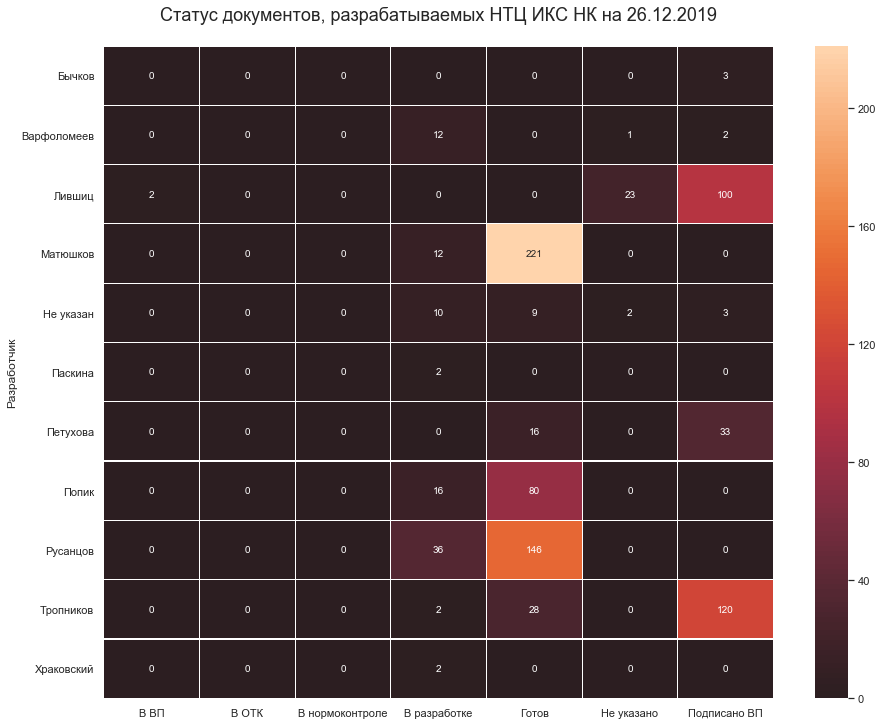

In [32]:
f, ax = plt.subplots(figsize=(15, 12))
ax.set_title('Статус документов, разрабатываемых НТЦ ИКС НК на ' + date, fontsize=18, y=1.03)
sns.heatmap(resultsns, annot=True, fmt="d", ax=ax, center=-20, linewidths=.2)
plt.savefig(pathsv + date + '_Все_документы_НТЦ_сотр.png');